<h1>Data Augmentation To Address Overfitting In Flower Classification CNN</h1>


<h4>
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc </h4>
     https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations
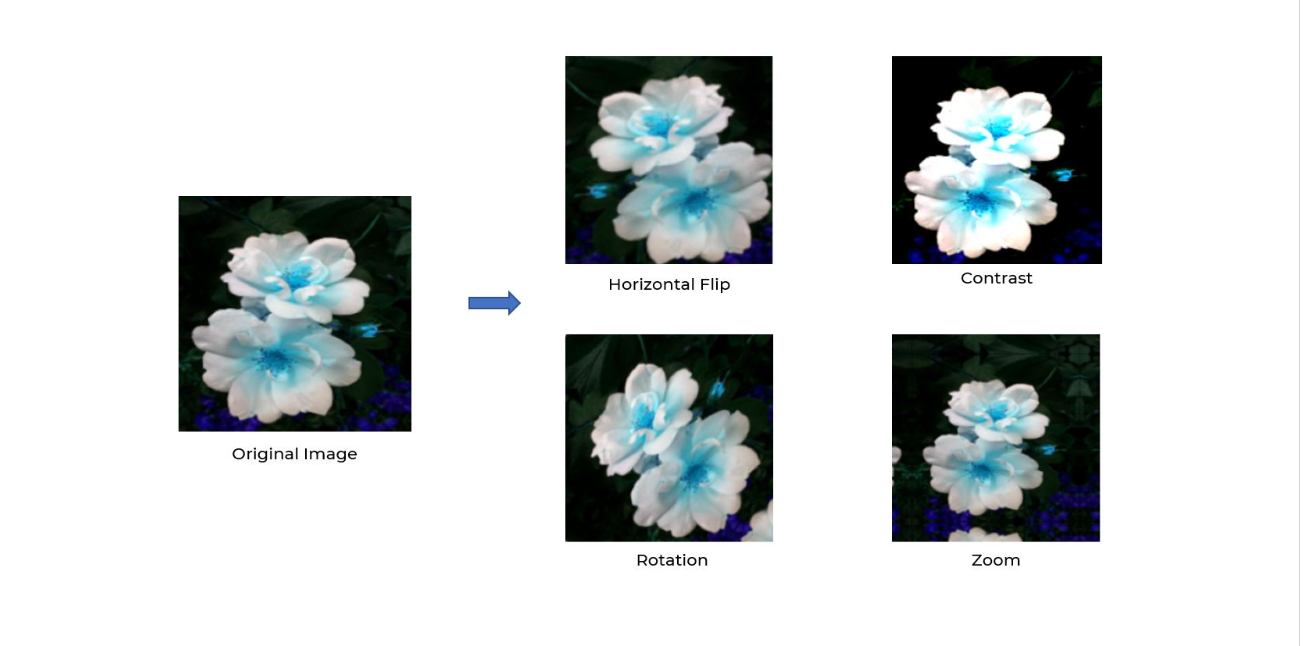

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h1 align="center">Load flowers dataset</h1>


In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [8]:
data_dir


'.\\datasets\\flower_photos'

In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
# Get the first image file in the directory (adjust the glob pattern if needed)
from PIL import Image
import pathlib
image_path = list(data_dir.glob('*/*.jpg'))[0]

# Open the image
image = Image.open(image_path)

# Show the image
image.show()

In [18]:
cv2.imread(list(data_dir.glob('*/*.jpg'))[0])

array([[[133, 135, 135],
        [136, 138, 138],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[132, 134, 134],
        [135, 137, 137],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[131, 133, 133],
        [134, 136, 136],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 27,  48,  45],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [124, 125, 129]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [127, 128, 132],
        [127, 128, 132]]

In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

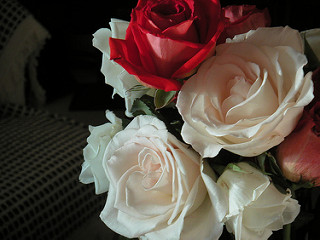

In [22]:
PIL.Image.open(str(roses[1]))


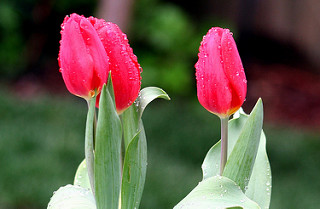

In [24]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h1 align="center">Read flowers images from disk into numpy array using opencv</h1>

In [27]:
flowers_list={
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'roses':list(data_dir.glob('roses/*'))
}

In [29]:
flowers_list['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [31]:
flowers_labels_list={
     'tulips':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'roses':4
}

In [33]:
flowers_labels_list

{'tulips': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'roses': 4}

In [35]:
image=cv2.imread(str(flowers_list['roses'][0]))

In [37]:
image.shape

(240, 179, 3)

In [39]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [46]:
X, y = [], []
for flower_name, images in flowers_list.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_list[flower_name])

In [47]:
X = np.array(X)
y = np.array(y)

# Train test split


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
len(X_train)

2752

# Preprocessing: scale images


In [56]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it


In [61]:
from tensorflow.keras.models import Sequential
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=3)    

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 402ms/step - accuracy: 0.3016 - loss: 1.6402
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.5942 - loss: 1.0042
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 397ms/step - accuracy: 0.6848 - loss: 0.8076


In [62]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5652 - loss: 1.0106


[1.022415280342102, 0.5806100368499756]

 # Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [66]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step


array([[ 1.329671  ,  1.5549378 ,  2.1539567 , -3.093897  ,  0.6998648 ],
       [ 1.1827503 ,  0.15476117, -0.59593904,  1.3925794 , -0.09342313],
       [ 1.157184  ,  2.7654107 ,  2.153269  , -2.7001727 , -0.85908276],
       ...,
       [ 1.0143232 , -2.155614  ,  1.2868365 ,  3.415382  , -1.3539147 ],
       [ 1.2206609 ,  0.95860827,  1.1526495 , -1.746178  , -0.7411766 ],
       [ 0.4854515 ,  1.4926825 ,  2.8520548 , -2.3255208 , -0.8334283 ]],
      dtype=float32)

In [68]:
score = tf.nn.softmax(predictions[0])


In [70]:
np.argmax(score)

2

In [72]:
y_test[0]


0

<h1 align="center">Improve Test Accuracy Using Data Augmentation
</h1>

In [75]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the image dimensions
img_height = 180
img_width = 180

# Data augmentation
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)



C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Orignal Image

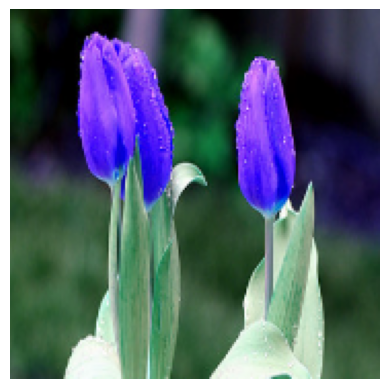

In [78]:
 plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation



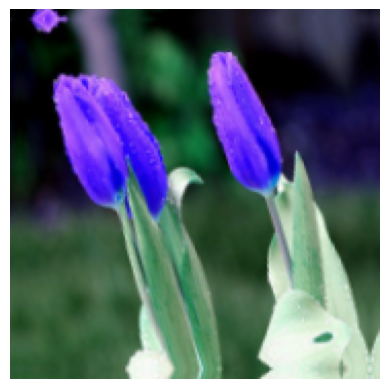

In [81]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer


In [84]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=3) 

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 566ms/step - accuracy: 0.3206 - loss: 1.7028
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 533ms/step - accuracy: 0.5777 - loss: 1.0740
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 537ms/step - accuracy: 0.6141 - loss: 1.0052


In [85]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6091 - loss: 0.9878


[0.9988380074501038, 0.5958605408668518]

# You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%



<h1 align="center">Transfer Learning<h1>

In [92]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [93]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.17.0
TensorFlow Hub version: 0.16.1


In [289]:
import tensorflow as tf
import tensorflow_hub as hub

# Define the input shape
IMAGE_SHAPE = (224, 224)

# Define the input tensor with the correct shape
inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,), dtype=tf.float32)

# Load the TensorFlow Hub layer for MobileNetV2
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", trainable=False)

# Apply the hub layer to the inputs
outputs = hub_layer(inputs)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


ValueError: Exception encountered when calling layer 'keras_layer_13' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_13' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_56>
  • training=None

In [291]:
# Load a sample image for testing
import numpy as np

# Create a dummy image with the correct shape
dummy_image = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Predict using the model
predictions = model.predict(dummy_image)
print(predictions)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 30976, but received input with shape (1, 50176)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape